# DuPont Data-Driven Enzyme Engineering Hackathon

# Introduction

- Introduction to enzymes
- Introduction to industrial biotechnology
- Proteases
- The protein engineering (optimization) challenge
- Overview of evaluation criteria
- Basics of screening

# Preamble

In [1]:
import MDAnalysis as md
import nglview as nv
import pandas as pd
import numpy as np
import plotnine as p9

In [2]:
from MDAnalysis import AtomGroup
from MDAnalysis.analysis import distances

# Test subject - A Serine Protease

Our test subject is one of the main workhorses for removing  protein stains (e.g. milk, egg) from fabric - the GG36 serine protease. The structure is publically available and looks like this.

In [3]:
u = md.Universe('data/1gci.pdb')
protein = u.select_atoms('protein')

In [4]:
view = nv.show_mdanalysis(protein)
view.clear_representations()
view.add_ribbon(color='atomindex')
view

NGLWidget()

The enzyme works by binding to another protein (e.g. part of a stain) and then, during a chemical reaction at the active site, breaking the polymer resulting in two peptides. 

The active site can be illustrated in the molecule visualization. As you can see - the residues that are part of the active site sit close in 3D space, but quite far in the 1D sequence.

In [5]:
active = [a.id for a in protein.atoms if a.resid in [32, 64, 221]]
active_alpha = [a.id for a in protein.atoms if a.resid in [32, 64, 221] and a.name == 'CA']

In [6]:
view.add_ball_and_stick(selection=active)
view.add_label(selection=active_alpha, color='blue')

MDAnalysis has a large number of features that you may find useful. E.g. computing distances between residues.

In [7]:
coords = np.concatenate([a.position.reshape(1, 3) for a in protein.select_atoms('name CA')])

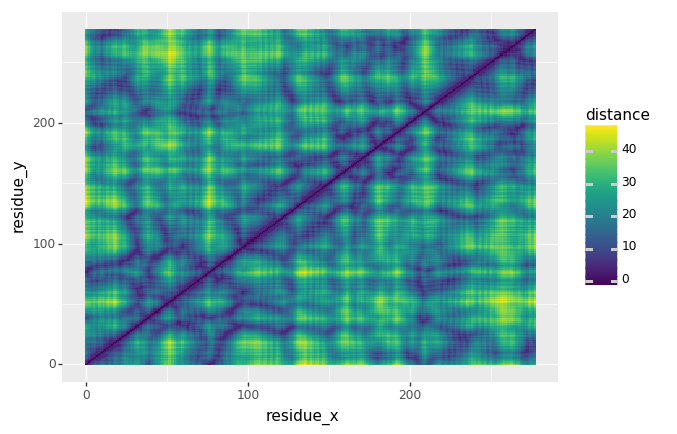

<ggplot: (8743809490594)>

In [9]:
df = (pd.melt(pd.DataFrame(distances.distance_array(coords, coords)).reset_index(), id_vars='index')
      .rename(columns={'index': 'residue_x', 'variable': 'residue_y', 'value': 'distance'})
      .assign(residue_y=lambda dd: dd.residue_y.astype(float))
     )

(p9.ggplot(df, p9.aes('residue_x', 'residue_y', fill='distance'))
 + p9.geom_tile()
)

For more information [see their documentation](https://www.mdanalysis.org/pages/learning_MDAnalysis/)

# Challenges

## Introduction

We have prepared 4 different challenges. In the first three, we have created data simulators where we have hidden a relationship between sequence and the output characteristics productivity (how easy it is to produce the enzyme), stability (e.g how much stress the enzyme can tolerate before in becomes inactivated) and performance (how well the active enzyme can degrade stains). 

In all cases, the tasks are the same

- Train a model that can predict the three enzyme characteristics in a train/test split. 
- Try to generate new variants that are better than the best in the training data. Submit them to the lab-simulation to test your predictions.
- Can you suggest what it is in the sequence that accounts for increased performance?

To submit your predictions to the lab-simulator, simply post it like this

In [96]:
import requests

# sequences as a list, one sequence per element.
sequences = [('AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRGGASFVPGEPSTQDGNGHGTHVA'
             'GTIAALNNSIGVLGVAPSAELLYAVKVLGASGSSGGSSVSSIAQGLEWAGNNGMHVANLSLGSPSPSA'
             'TLEQAVNSATSRGVLVVAASGNSGAGSISYPARYANAMAVGATDQNNNRASFSQYGAGLDIVAPGVNV'
             'QSTYPGSTAASLNGTSMATPHVAGAAALVKQKNPSWSNVQIRNHLKNTATSLGGSSTTNNLYGSGLVA'
             'AEAATR'),
             ('AQSVPWGASRVQAPAAHNRGLTGSGVAVAVLDTGISTHPDLNIRRGGASFVPGEPSTQDGNGHGTHVA'
             'GTIAALNNSIGVLGVAPSAELLYAVKVLGASGSSGGSSVSSIAQGLEWAGNNGMHVANLSLGSPSPSA'
             'TLEQAVNSATSRGVLVVAASGNSGAGSISYPARYANAMAVGATDQNNNRASFSQYGAGLDIVAPGVNV'
             'QSTYPGSTYASLNGTSMATPHVAGAAALVKQKNPSWSNVQIRNHLKNTATSLGGSSTTNNLYGSGLVN'
             'AEAATR')]

payload = {'team': 'footeam', 'challenge': 0, 'sequences': sequences}

r = requests.post('http://find-the.best/enzyme', json=payload)
r.status_code, r.reason

(200, 'OK')

In [95]:
pd.DataFrame(r.json())

,fitness,performance,productivity,sequence,stability
0,4.253165,0.933250,4.176831,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,1.091107
1,5.805519,7.056698,0.859648,AQSVPWGASRVQAPAAHNRGLTGSGVAVAVLDTGISTHPDLNIRRG...,0.957015


## Challenge 0 - Optimization With Simulated Data 0

We have generated data that hold a straight-forward signal between productivity, stability and performance. See data in `data/challenge-0.csv`.

- Train a model that can predict the three enzyme characteristics in a train/test split. It is possible to reach $R^2>0.95$ for all three outputs.
- Try to generate new variants that are better than the best in the training data. Submit them to **URL** to test your predictions.
- Can you suggest what it is in the sequence that accounts for increased performance?

## Challenge 1 - Optimization With Simulated Data 1

We have generated data that hold a more complex signal between productivity, stability and performance where sequence order matters. See data in `data/challenge-0.csv`.

- Train a model that can predict the three enzyme characteristics in a train/test split. It is possible to reach ?? for all three outputs.
- Try to generate new variants that are better than the best in the training data. Submit them to **URL** to test your predictions.
- Can you suggest what it is in the sequence that accounts for increased performance?

## Challenge 2 - Optimization With Simulated Data 2

We have generated data that hold a different type of signal between productivity, stability and performance where sequence order matters. See data in `data/challenge-2.csv`.

- Train a model that can predict the three enzyme characteristics in a train/test split.
- Try to generate new variants that are better than the best in the training data. Submit them to **URL** to test your predictions.
- Can you suggest what it is in the sequence that accounts for increased performance?

## Challenge 3 - Creating Combinations With Real Data

The last challenge is to predict unseen single substitution effects based on a partial single substitution library. Additionally, you can try to predict the effect of combining substitutions. 

Data on single effects is provided in `data/real-sel.csv` and combinations are in `data/real-combinations.csv` and also publically available via the [US20100192985A1 patent](https://patents.google.com/patent/US20100192985A1/en?oq=+US2010%2f0192985+A1)

- Train a model that can predict the effect of unseen single substitutions.
- Train a model that can predict the effect of combinations.  

As this is real data, the lab-simulator can not help to score sequences - performance is judged on model fit alone.